In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import numpy as np
import seaborn as sns

<Axes: xlabel='time'>

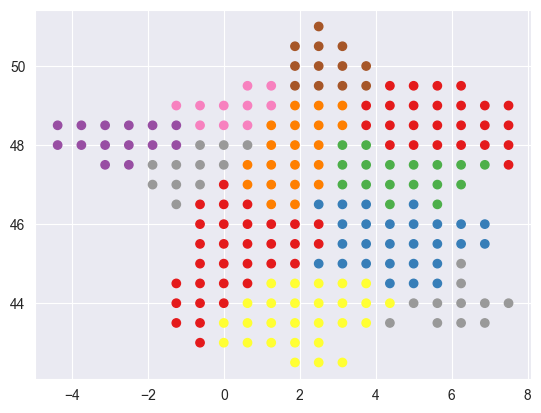

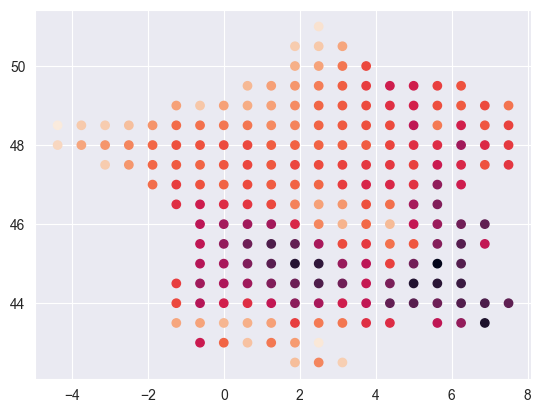

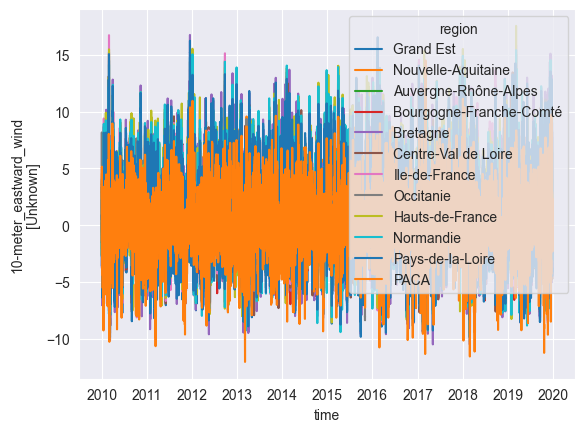

<Figure size 640x480 with 0 Axes>

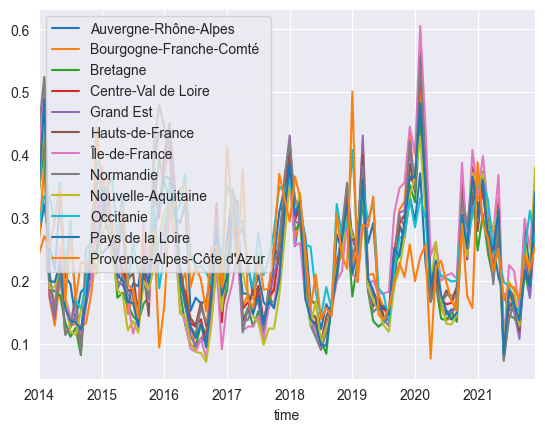

In [27]:
# Directories where you saved the data
data_dir_energy = Path('energy_france')
data_dir_climate = Path('climate_france')
                        
# Template filenames
filename_mask = 'mask_datagouv_french_regions_merra2_Nx_France.nc'
filename_climate = 'merra2_area_selection_output_{}_merra2_2010-2019.nc'
filename_energy = 'reseaux_energies_{}.csv'

# Read and plot grid point-region mask
filepath_mask = Path(data_dir_climate, filename_mask)
ds_mask = xr.load_dataset(filepath_mask)
da_mask = ds_mask['mask']
plt.figure()
plt.scatter(da_mask['lon'], da_mask['lat'], c=da_mask, cmap='Set1')

# Read a climate variable and plot its mean over time
variable_name = 'zonal_wind'
filename = filename_climate.format(variable_name)
filepath = Path(data_dir_climate, filename)
da_zonal_wind = xr.load_dataset(filepath)[variable_name]
plt.figure()
plt.scatter(da_mask['lon'], da_mask['lat'], c=da_zonal_wind.mean('time'))

variable_name = 'meridional_wind'
filename = filename_climate.format(variable_name)
filepath = Path(data_dir_climate, filename)
da_meridional_wind = xr.load_dataset(filepath)[variable_name]

# Compute regional mean of climate variable and plot time series
da_climate_reg = da_zonal_wind.groupby(da_mask).mean().rename(mask='region')
da_climate_reg['region'] = ds_mask['region'].values
plt.figure()
da_climate_reg.plot.line(x='time')

# Read energy variable and plot time series
variable_name = 'capacityfactor_wind-onshore'
filename = filename_energy.format(variable_name)
filepath = Path(data_dir_energy, filename)
df_energy = pd.read_csv(filepath, index_col=0, header=0, parse_dates=True)
plt.figure()
df_energy.plot()



In [28]:
wind_array = np.sqrt(da_meridional_wind**2 + da_zonal_wind**2)

monthly_wind_mean = wind_array.resample(time='1ME').mean()

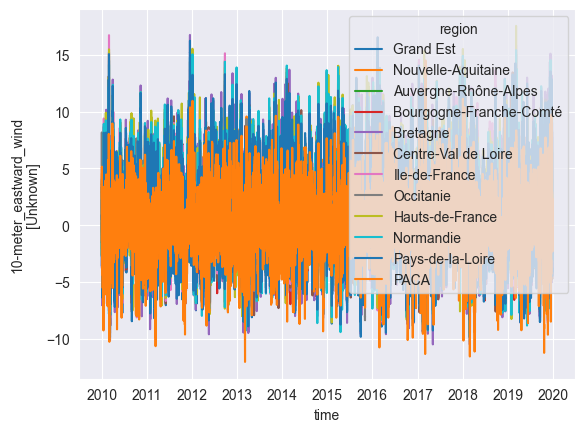

In [29]:
da_wind_reg = monthly_wind_mean.groupby(da_mask).mean().rename(mask='region')
da_wind_reg['region'] = ds_mask['region'].values
plt.figure()
da_climate_reg.plot.line(x='time')
plt.show()

In [30]:
da_wind_reg = da_wind_reg.sel(time=slice('2014-01-01', '2019-12-31'))
df_energy = df_energy.loc['2014-01-01':'2019-12-31']

In [31]:
df_wind = da_wind_reg.to_pandas()

In [32]:
df_wind.sort_index()

region,Grand Est,Nouvelle-Aquitaine,Auvergne-Rhône-Alpes,Bourgogne-Franche-Comté,Bretagne,Centre-Val de Loire,Ile-de-France,Occitanie,Hauts-de-France,Normandie,Pays-de-la-Loire,PACA
time,,,,,,,,,,,,
2014-01-31,4.471033,4.348247,3.385047,4.331848,6.541332,5.216271,5.445381,3.802262,6.250730,6.249713,5.351345,3.473030
2014-02-28,5.228498,5.488293,3.969629,5.294989,8.104619,6.537807,6.491930,4.266872,7.130648,7.480851,6.919350,3.753783
2014-03-31,3.247862,3.737462,3.169869,3.308689,4.774360,3.765674,3.785264,4.118966,4.192514,4.400593,3.966221,3.566239
2014-04-30,2.989822,3.612039,3.154355,3.235733,4.781591,3.760678,3.418167,3.707929,3.758075,3.925559,4.133669,3.584715
2014-05-31,3.916245,4.029611,3.958974,4.327494,4.873780,4.599434,4.381525,4.121242,4.590732,4.870740,4.622843,4.156127
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,2.935242,2.852736,2.620896,2.927428,4.422352,3.554445,3.471418,2.702522,3.772703,3.950350,3.826699,2.967331
2019-09-30,3.735931,3.661603,3.091064,3.888781,5.657197,4.545930,4.511178,3.177065,4.779937,5.092583,4.978077,3.624991
2019-10-31,4.280705,3.892113,3.436332,4.104208,5.638809,4.868557,5.029251,3.638608,5.176669,5.388301,4.849962,3.820495


In [33]:
df_X = df_wind.reset_index().melt(
    id_vars="time", 
    var_name="region", 
    value_name="wind_speed"
)

df_X = df_X.sort_values(by="time").reset_index(drop=True)

In [34]:
# df_X = df_X['wind_speed']

In [35]:
# df_X["month"] = df_X["time"].dt.month

In [36]:
df_X = df_X.drop(columns=["time"])

In [37]:
X = df_X

In [38]:
X

,region,wind_speed
0,Grand Est,4.471033
1,Normandie,6.249713
2,Hauts-de-France,6.250730
3,Occitanie,3.802262
4,Ile-de-France,5.445381
...,...,...
859,Auvergne-Rhône-Alpes,3.954124
860,Nouvelle-Aquitaine,4.845899
861,Grand Est,4.999985
862,Pays-de-la-Loire,5.720450


In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
le = LabelEncoder()
df_X["region"] = le.fit_transform(df_X["region"])
df_X

,region,wind_speed
0,4,4.471033
1,7,6.249713
2,5,6.250730
3,9,3.802262
4,6,5.445381
...,...,...
859,0,3.954124
860,8,4.845899
861,4,4.999985
862,11,5.720450


In [41]:
df_y = df_energy.reset_index().melt(
    id_vars="time", 
    var_name="region", 
    value_name="capacity factor"
)

df_y = df_y.sort_values(by="time").reset_index(drop=True)
df_y

,time,region,capacity factor
0,2014-01-01,Auvergne-Rhône-Alpes,0.272
1,2014-01-01,Occitanie,0.290
2,2014-01-01,Nouvelle-Aquitaine,0.345
3,2014-01-01,Normandie,0.446
4,2014-01-01,Île-de-France,0.397
...,...,...,...
859,2019-12-01,Bretagne,0.352
860,2019-12-01,Bourgogne-Franche-Comté,0.435
861,2019-12-01,Auvergne-Rhône-Alpes,0.334
862,2019-12-01,Pays de la Loire,0.366


In [42]:
df_y = df_y.drop(columns=["time", "region"])

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, df_y, test_size=0.2, random_state=42)

In [45]:
X_train.shape

(691, 2)

In [46]:
def train_lasso(alpha, X, y):
    lasso = linear_model.Lasso(alpha=alpha)
    lasso.fit(X, y)
    return lasso

In [47]:
lasso = linear_model.Lasso()
param_grid_ls = {'alpha': np.linspace(0.0001, 1.0, 50), 'warm_start': [True, False]}
ls_cv = GridSearchCV(lasso, param_grid_ls, cv=5)

In [48]:
ls_cv.fit(X_train, y_train)
print(ls_cv.best_params_)
best_lasso = ls_cv.best_estimator_

{'alpha': 0.0001, 'warm_start': True}


In [49]:
accuracy = best_lasso.score(X_test, y_test)
accuracy

0.3800843888683989

In [50]:
def add_feature(da, X, feature_name):
    
    df = da.to_pandas()
    df = df.reset_index().melt(
        id_vars="time", 
        var_name="region", 
        value_name=feature_name
    )
    df = df.sort_values(by="time").reset_index(drop=True)
    df = df[feature_name]
    X = pd.concat([X, df], axis=1)
    return X

In [51]:
# Density Extraction

variable_name = 'surface_density'
filename = filename_climate.format(variable_name)
filepath = Path(data_dir_climate, filename)
da_surface_density = xr.load_dataset(filepath)[variable_name]

da_surface_density_montlhy = da_surface_density.resample(time='1ME').mean()
da_surface_density_reg = da_surface_density_montlhy.groupby(da_mask).mean().rename(mask='region')
da_surface_density_reg['region'] = ds_mask['region'].values
da_surface_density_reg = da_surface_density_reg.sel(time=slice('2014-01-01', '2019-12-31'))

X = add_feature(da_surface_density_reg, X, "density")
X

,region,wind_speed,density
0,4,4.471033,1.224567
1,7,6.249713,1.230758
2,5,6.250730,1.242508
3,9,3.802262,1.184342
4,6,5.445381,1.239542
...,...,...,...
859,0,3.954124,1.166310
860,8,4.845899,1.223121
861,4,4.999985,1.228415
862,11,5.720450,1.245126


In [52]:
# Temperature 

variable_name = 'surface_temperature'
filename = filename_climate.format(variable_name)
filepath = Path(data_dir_climate, filename)
da_surface_temp = xr.load_dataset(filepath)[variable_name]

da_surface_temp_montlhy = da_surface_temp.resample(time='1ME').mean()
da_surface_temp_reg = da_surface_temp_montlhy.groupby(da_mask).mean().rename(mask='region')
da_surface_temp_reg['region'] = ds_mask['region'].values
da_surface_temp_reg = da_surface_temp_reg.sel(time=slice('2014-01-01', '2019-12-31'))

X = add_feature(da_surface_temp_reg, X, "temperature")

In [53]:
#Height 500

variable_name = 'height_500'
filename = filename_climate.format(variable_name)
filepath = Path(data_dir_climate, filename)
da_height_500 = xr.load_dataset(filepath)[variable_name]

da_height_500_montlhy = da_height_500.resample(time='1ME').mean()
da_height_500_reg = da_height_500_montlhy.groupby(da_mask).mean().rename(mask='region')
da_height_500_reg['region'] = ds_mask['region'].values
da_height_500_reg = da_height_500_reg.sel(time=slice('2014-01-01', '2019-12-31'))

X = add_feature(da_height_500_reg, X, "height_500")

In [54]:
X.shape

(864, 5)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, df_y, test_size=0.2, random_state=42)

In [56]:
lasso = train_lasso(0.0001, X_train, y_train)
accuracy = lasso.score(X_test, y_test)
accuracy

0.5606982644985445

In [57]:
def reshapeArray(array):
    array = array.groupby(da_mask).mean().rename(mask='region')
    array['region'] = ds_mask['region'].values
    array = array.sel(time=slice('2014-01-01', '2019-12-31'))
    return array

In [58]:
#WIND SPEED
monthly_wind_min = wind_array.resample(time='1ME').min()
monthly_wind_max = wind_array.resample(time='1ME').max()
monthly_wind_std = wind_array.resample(time='1ME').std()
monthly_wind_var = wind_array.resample(time='1ME').var()

da_wind_reg_min = reshapeArray(monthly_wind_min)
da_wind_reg_max = reshapeArray(monthly_wind_max)
da_wind_reg_std = reshapeArray(monthly_wind_std)
da_wind_reg_var = reshapeArray(monthly_wind_var)

wind_array_cube = wind_array**3
wind_array_cube = wind_array_cube.resample(time='1ME').mean()
wind_array_cube = reshapeArray(wind_array_cube)

In [59]:
X = add_feature(da_wind_reg_var,X, "wind_var")
X = add_feature(da_wind_reg_std,X, "wind_std")
X = add_feature(da_wind_reg_max,X, "wind_max")
X = add_feature(da_wind_reg_min,X, "wind_min")
X = add_feature(wind_array_cube,X, "wind_cube")
X

,region,wind_speed,density,temperature,height_500,wind_var,wind_std,wind_max,wind_min,wind_cube
0,4,4.471033,1.224567,276.738556,5457.524902,3.747965,1.913444,10.805568,0.342017,152.853821
1,7,6.249713,1.230758,278.975800,5426.675781,8.094595,2.837001,14.423610,0.617211,407.056580
2,5,6.250730,1.242508,278.103119,5418.401855,6.213293,2.482862,13.240123,0.720422,371.695801
3,9,3.802262,1.184342,279.471191,5526.241699,3.707209,1.891394,9.724280,0.187934,108.221443
4,6,5.445381,1.239542,278.326813,5441.877441,5.375361,2.317015,12.843593,0.713326,254.245667
...,...,...,...,...,...,...,...,...,...,...
859,0,3.954124,1.166310,277.858948,5600.200195,6.046566,2.375380,12.635825,0.151835,168.917801
860,8,4.845899,1.223121,281.079712,5615.462891,7.439332,2.693640,14.047593,0.234808,258.852295
861,4,4.999985,1.228415,277.263885,5552.700195,6.393699,2.509099,13.066129,0.591719,243.603943
862,11,5.720450,1.245126,280.306000,5577.145020,8.350408,2.884501,14.306827,0.633577,346.943176


In [91]:
X.iloc[:, 1:]

,wind_speed,density,temperature,height_500,wind_var,wind_std,wind_max,wind_min,wind_cube
0,4.471033,1.224567,276.738556,5457.524902,3.747965,1.913444,10.805568,0.342017,152.853821
1,6.249713,1.230758,278.975800,5426.675781,8.094595,2.837001,14.423610,0.617211,407.056580
2,6.250730,1.242508,278.103119,5418.401855,6.213293,2.482862,13.240123,0.720422,371.695801
3,3.802262,1.184342,279.471191,5526.241699,3.707209,1.891394,9.724280,0.187934,108.221443
4,5.445381,1.239542,278.326813,5441.877441,5.375361,2.317015,12.843593,0.713326,254.245667
...,...,...,...,...,...,...,...,...,...
859,3.954124,1.166310,277.858948,5600.200195,6.046566,2.375380,12.635825,0.151835,168.917801
860,4.845899,1.223121,281.079712,5615.462891,7.439332,2.693640,14.047593,0.234808,258.852295
861,4.999985,1.228415,277.263885,5552.700195,6.393699,2.509099,13.066129,0.591719,243.603943
862,5.720450,1.245126,280.306000,5577.145020,8.350408,2.884501,14.306827,0.633577,346.943176


In [229]:
from sklearn.preprocessing import StandardScaler

X_to_scale = X.iloc[:, 1:]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_to_scale)

In [230]:
X_scaled = pd.DataFrame(X_scaled, columns=X_to_scale.columns)
X_scaled["region"] = X["region"]
X_scaled

,wind_speed,density,temperature,height_500,wind_var,wind_std,wind_max,wind_min,wind_cube,region
0,0.429739,0.627725,-1.358417,-1.743196,-0.259707,-0.169293,-0.069636,0.279980,0.043185,4
1,2.412611,0.778494,-0.975160,-2.021829,1.932967,1.846133,1.428249,1.708413,2.570744,7
2,2.413744,1.064627,-1.124657,-2.096560,0.983937,1.073316,0.938281,2.244146,2.219149,5
3,-0.315805,-0.351805,-0.890296,-1.122536,-0.280266,-0.217412,-0.517294,-0.519816,-0.400599,9
4,1.515942,0.992391,-1.086336,-1.884526,0.561239,0.711396,0.774115,2.207311,1.051332,6
...,...,...,...,...,...,...,...,...,...,...
859,-0.146509,-0.790908,-1.166485,-0.454533,0.899831,0.838763,0.688099,-0.707191,0.202910,0
860,0.847640,0.592521,-0.614744,-0.316678,1.602417,1.533285,1.272577,-0.276506,1.097137,8
861,1.019415,0.721443,-1.268424,-0.883559,1.074944,1.130572,0.866246,1.576094,0.945521,4
862,1.822588,1.128384,-0.747287,-0.662770,2.062013,1.949790,1.379901,1.793366,1.973032,11


<Axes: >

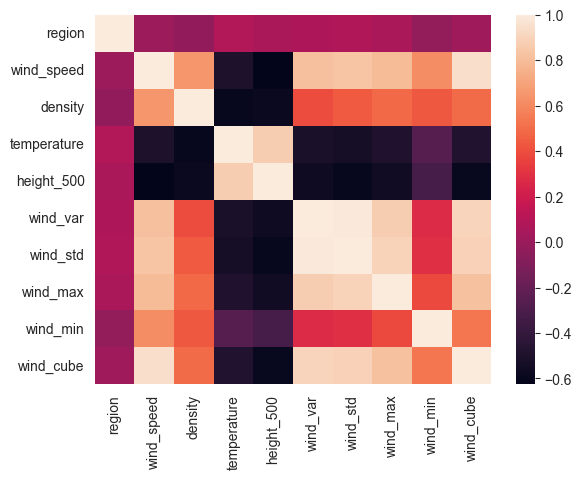

In [231]:
corr_matrix = X.corr()
sns.heatmap(corr_matrix)

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df_y, test_size=0.2, random_state=42)

In [233]:
X_train

,wind_speed,density,temperature,height_500,wind_var,wind_std,wind_max,wind_min,wind_cube,region
651,-1.581818,-1.267182,1.729689,1.290919,-1.499519,-1.878235,-1.938274,-0.804362,-1.173466,1
352,0.088491,0.239687,0.675657,0.467063,-0.560433,-0.494220,-0.389259,-0.098570,-0.321708,2
606,0.913040,0.829751,-1.025390,-2.256506,-0.006482,0.153396,0.452401,0.326311,0.377709,6
7,2.737707,0.744219,-0.612203,-1.983588,2.680415,2.395537,2.155956,0.990991,3.468702,2
445,0.382906,0.655776,-0.638693,-0.657160,1.651468,1.549974,1.686950,-0.116935,0.772351,8
...,...,...,...,...,...,...,...,...,...,...
106,-0.981122,0.028810,1.124738,1.053945,-1.230957,-1.409201,-1.828326,-0.452998,-0.967671,11
270,-0.506813,-1.266701,-0.336045,0.584353,0.834096,0.775741,0.564724,-0.645867,0.035972,10
860,0.847640,0.592521,-0.614744,-0.316678,1.602417,1.533285,1.272577,-0.276506,1.097137,8
435,0.169093,2.105278,-1.854199,-0.919877,0.231150,0.385007,2.027615,-0.341511,0.012441,5


In [234]:
from sklearn.metrics import r2_score

In [235]:
lasso = linear_model.Lasso(alpha=0.0001, warm_start=True)

In [236]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, warm_start=True)

In [237]:
pred = lasso.predict(X_test)
accuracy = r2_score(y_test, pred)

In [238]:
accuracy

0.5610696454538675

<StemContainer object of 3 artists>

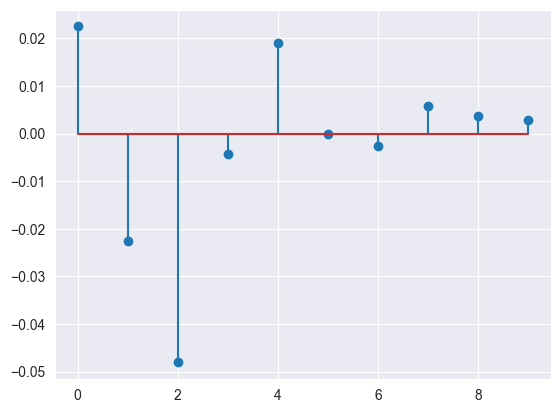

In [239]:
coefs = lasso.coef_
plt.stem(coefs)

In [240]:
ridge = linear_model.Ridge()
param_grid_rd = {'alpha': np.linspace(0.0001, 1.0, 50)}
rd_cv = GridSearchCV(ridge, param_grid_rd, cv=5)

In [241]:
rd_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-04, 2.05061224e-02, 4.09122449e-02, 6.13183673e-02,
       8.17244898e-02, 1.02130612e-01, 1.22536735e-01, 1.42942857e-01,
       1.63348980e-01, 1.83755102e-01, 2.04161224e-01, 2.24567347e-01,
       2.44973469e-01, 2.65379592e-01, 2.85785714e-01, 3.06191837e-01,
       3.26597959e-01, 3.47004082e-01, 3.67410204e-01, 3....
       4.89846939e-01, 5.10253061e-01, 5.30659184e-01, 5.51065306e-01,
       5.71471429e-01, 5.91877551e-01, 6.12283673e-01, 6.32689796e-01,
       6.53095918e-01, 6.73502041e-01, 6.93908163e-01, 7.14314286e-01,
       7.34720408e-01, 7.55126531e-01, 7.75532653e-01, 7.95938776e-01,
       8.16344898e-01, 8.36751020e-01, 8.57157143e-01, 8.77563265e-01,
       8.97969388e-01, 9.18375510e-01, 9.38781633e-01, 9.59187755e-01,
       9.79593878e-01, 1.00000000e+00])})

In [242]:
best_ridge = rd_cv.best_estimator_
pred = best_ridge.predict(X_test)
accuracy = r2_score(y_test, pred)
accuracy

0.5597903901803636

<StemContainer object of 3 artists>

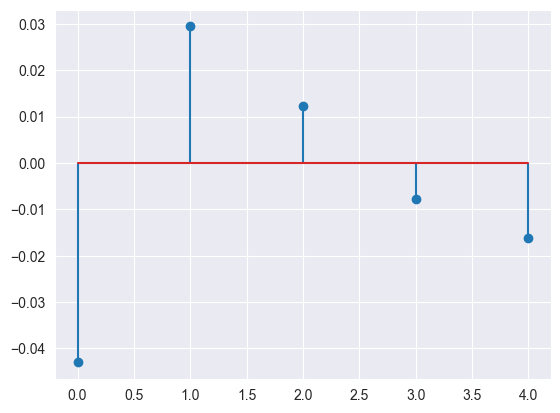

In [214]:
ridge_coefs = best_ridge.coef_
plt.stem(ridge_coefs.reshape(-1))

In [243]:
from sklearn.ensemble import RandomForestRegressor

In [244]:
rf = RandomForestRegressor()

In [245]:
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [10, 20, 30, 40, 50],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']
}
rf_cv = GridSearchCV(rf, param_grid_rf, cv=5)

In [246]:
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'n_estimators': [10, 50, 100, 200]})

In [247]:
rf_cv.best_params_

{'criterion': 'poisson', 'max_depth': 30, 'n_estimators': 200}

In [248]:
best_rf = rf_cv.best_estimator_

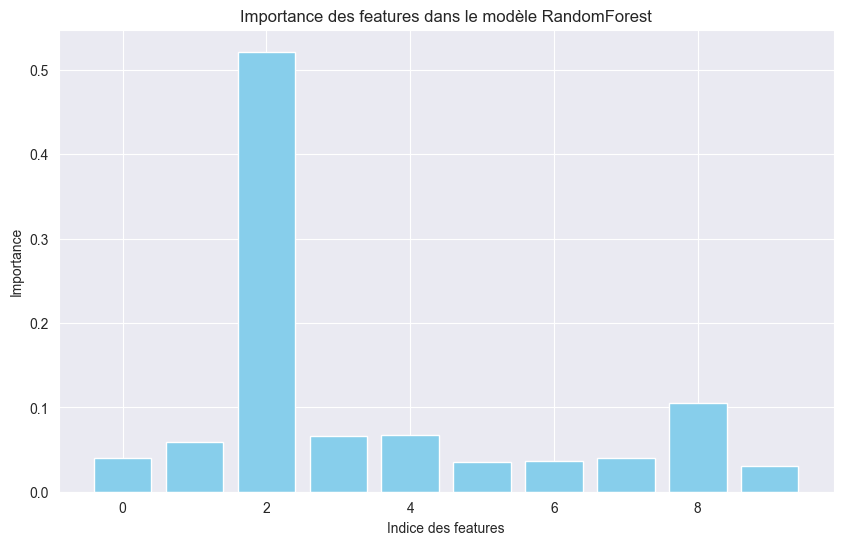

In [249]:
feature_importances = best_rf.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, color="skyblue")
plt.xlabel("Indice des features")
plt.ylabel("Importance")
plt.title("Importance des features dans le modèle RandomForest")
plt.show()

In [250]:
pred = best_rf.predict(X_test)
accuracy = r2_score(y_test, pred)
accuracy

0.6052419887344038

In [251]:
from sklearn.svm import SVR

In [252]:
svr = SVR()

In [253]:
param_grid_svr = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.1, 0.01, 0.001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4]
}

In [254]:
svr_cv = GridSearchCV(svr, param_grid_svr, cv=5)

In [ ]:
svr_cv.fit(X_train, y_train)

In [ ]:
print(svr_cv.best_params_)

In [ ]:
best_svr = svr_cv.best_estimator_
pred = best_svr.predict(X_test)
accuracy = best_svr.r2_score(y_test, pred)
accuracy

# Ajoue d'une variable a la fois

In [ ]:
accuracys = np.zeros(len(X.columns))
best_X = pd.DataFrame()
for i in range(1, len(X.columns)):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled.iloc[:, :i], df_y, test_size=0.2, random_state=42)
    svr = SVR(C=1, epsilon=0.001, kernel='rbf', degree=2)
    svr.fit(X_train, y_train)
    acc = svr.score(X_test, y_test)
    if acc > np.max(accuracy):
        best_X = X_scaled.iloc[:, :i]
    accuracys[i] = acc

In [ ]:
accuracys

In [ ]:
plt.plot(range(0, len(X.columns)), accuracys)

In [ ]:
features_nbr = np.argmax(accuracys)
features_nbr

In [ ]:
keep_features = feature_importances.argsort()[-features_nbr:][::-1]
new_X = X_scaled.iloc[:, keep_features]
new_X

In [ ]:
new_svr = SVR(C=0.1, epsilon=0.001, kernel='rbf', degree=2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_X, df_y, test_size=0.2, random_state=42)

In [ ]:
new_svr.fit(X_train, y_train)

In [ ]:
accuracy = new_svr.score(X_test, y_test)
accuracy